In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")

In [4]:
metadata = pd.read_csv("../data/meta/meta_data_v2.csv")

In [10]:
metadata = metadata.set_index('Column Name')

In [3]:
train_df.shape

(1460, 81)

In [7]:
print(metadata['Column Name'].tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

### Univariate Analysis

In [11]:
metadata.iloc[0, :]

Explanation                          Id of the record
Category                                            -
Sub Category                                        -
Relationship strength with Target                   -
present data type                               int64
valid data type                                   NaN
Fill rate in train data                         100.0
Remarks                                           NaN
Name: Id, dtype: object

In [9]:
# Id should be unique

train_df['Id'].duplicated().sum()

0

In [13]:
metadata.iloc[1, :]

Explanation                          Identifies the type of dwelling involved in th...
Category                                                                       Quality
Sub Category                                                             House Quality
Relationship strength with Target                                               Strong
present data type                                                                int64
valid data type                                                                    NaN
Fill rate in train data                                                          100.0
Remarks                                                                            NaN
Name: MSSubClass, dtype: object

In [18]:
# MSSubClass

train_df['MSSubClass'].value_counts(normalize=True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

The most selling categories are:
1. 20: 1-STORY 1946 & NEWER ALL STYLES
2. 60: 2-STORY 1946 & NEWER
3. 50: 1-1/2 STORY FINISHED ALL AGES
4. 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
5. 30: 1-STORY 1945 & OLDER

These 5 category summed to 77.74%

In [19]:
metadata.iloc[2, :]

Explanation                          Zone of the house location
Category                                               Location
Sub Category                                      Communication
Relationship strength with Target                        Strong
present data type                                        object
valid data type                                             NaN
Fill rate in train data                                   100.0
Remarks                                                     NaN
Name: MSZoning, dtype: object

In [22]:
train_df['MSZoning'].value_counts(normalize=True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Top 3 categories comprised of 98.21%
1. RL: Residential Low Density
2. RM: Residential medium Density
3. FV: Floating Village Residential

In [24]:
metadata.iloc[3, :]

Explanation                          Linear feet of street connected to property
Category                                                                 Quality
Sub Category                                                       Outer Quality
Relationship strength with Target                                         Strong
present data type                                                        float64
valid data type                                                              NaN
Fill rate in train data                                                82.260274
Remarks                                                                      NaN
Name: LotFrontage, dtype: object

In [26]:
train_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

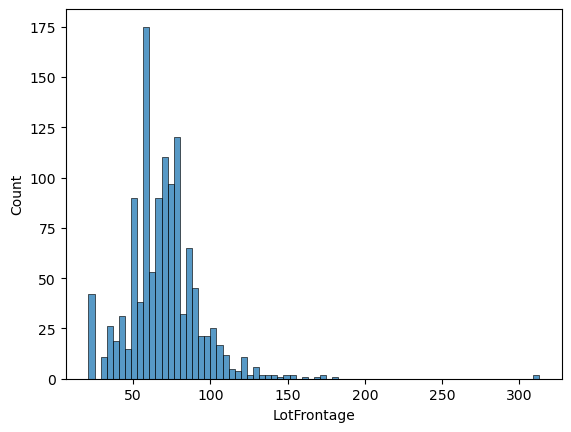

In [28]:
sns.histplot(train_df['LotFrontage'])
plt.show()

In [30]:
train_df['LotFrontage'].quantile(0.95), train_df['LotFrontage'].quantile(0.99)

(107.0, 141.0)

75% of the houses are located within 69 feet distance, upto 95% of dataset is below 107 feet, 99% of the house is less than 141 ft. Highest is 313 ft

In [31]:
metadata.iloc[4, :]

Explanation                          Lot size in square feet
Category                                             Quality
Sub Category                                   Inner Quality
Relationship strength with Target                     Strong
present data type                                      int64
valid data type                                          NaN
Fill rate in train data                                100.0
Remarks                                                  NaN
Name: LotArea, dtype: object

In [32]:
train_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

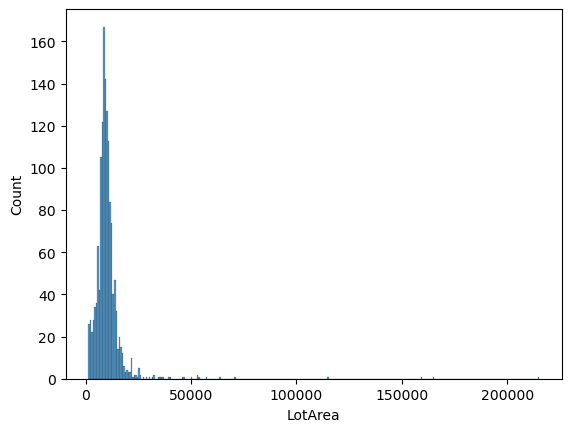

In [34]:
sns.histplot(train_df['LotArea'])
plt.show()

In [38]:
train_df['LotArea'].quantile(0.95), train_df['LotArea'].quantile(0.99)

(17401.149999999998, 37567.64000000021)

Lot area is rightly skewed (positive skew). 75% of the record has less than 12k sq feet lot area. And 99% data has
less than 38k sq feet. Median value is 9478 sq feet.

In [40]:
metadata.iloc[5, :]

Explanation                          Type of road access to property
Category                                               Communication
Sub Category                                           Communication
Relationship strength with Target                               Weak
present data type                                             object
valid data type                                                  NaN
Fill rate in train data                                        100.0
Remarks                                                          NaN
Name: Street, dtype: object

In [42]:
train_df['Street'].value_counts(normalize=True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

- Allmost all the roads are paved (made using cement bricks), only 0.4% of the roads are gravel.

In [43]:
metadata.iloc[6]

Explanation                          Type of alley access to property
Category                                                Communication
Sub Category                                            Communication
Relationship strength with Target                                Weak
present data type                                              object
valid data type                                                   NaN
Fill rate in train data                                      6.232877
Remarks                                                           NaN
Name: Alley, dtype: object

In [44]:
train_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

- Just check whether there is an alley or not. Then check the alley type. And check when it becomes null values.

In [45]:
metadata.iloc[7]

Explanation                          shape of the property
Category                                           Quality
Sub Category                                 Inner Quality
Relationship strength with Target                 Moderate
present data type                                   object
valid data type                                        NaN
Fill rate in train data                              100.0
Remarks                                                NaN
Name: LotShape, dtype: object

In [56]:
train_df['LotShape'].value_counts(dropna=False, normalize=True)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

- Regular and IR1 contains 96.5% of dataset. Iregular type 2 and type 3 contains 3.5%.

In [48]:
metadata.iloc[8]

Explanation                          Flatness of the property
Category                                              Quality
Sub Category                                    Inner Quality
Relationship strength with Target                    Moderate
present data type                                      object
valid data type                                           NaN
Fill rate in train data                                 100.0
Remarks                                                   NaN
Name: LandContour, dtype: object

In [57]:
train_df['LandContour'].value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

- only Near Flat/Level contains around 90% of the property.

In [52]:
metadata.iloc[9]

Explanation                          Type of utilities available like electricity
Category                                                                   Others
Sub Category                                                               Others
Relationship strength with Target                                            Weak
present data type                                                          object
valid data type                                                               NaN
Fill rate in train data                                                     100.0
Remarks                                                                       NaN
Name: Utilities, dtype: object

In [53]:
train_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- allmost all the data contains Allpub services. Only 1 is with NoSeWa. We need to check the other 
independent variable

In [54]:
metadata.iloc[10]

Explanation                          Type of lot: inside lot, corner lot etc
Category                                                             Quality
Sub Category                                                   Inner Quality
Relationship strength with Target                                   Moderate
present data type                                                     object
valid data type                                                          NaN
Fill rate in train data                                                100.0
Remarks                                                                  NaN
Name: LotConfig, dtype: object

In [59]:
train_df['LotConfig'].value_counts(normalize=True)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

- only Inside and Corner plot covered 90% of the dataset. Ideally FR2 and FR3 should have the lower price compared to others.

In [60]:
metadata.iloc[11]

Explanation                          Slope of the property
Category                                           Quality
Sub Category                                 Inner Quality
Relationship strength with Target                 Moderate
present data type                                   object
valid data type                                        NaN
Fill rate in train data                              100.0
Remarks                                                NaN
Name: LandSlope, dtype: object

In [62]:
train_df['LandSlope'].value_counts(normalize=True)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

- Allmost 94% of the data is gentle slope. And 6% is moderate and severe slope. Moderate and severe slope properties should have lower price comparision to the Gentle slope.

In [63]:
metadata.iloc[12]

Explanation                          Location inside the city
Category                                        Communication
Sub Category                                    Communication
Relationship strength with Target                      Strong
present data type                                      object
valid data type                                           NaN
Fill rate in train data                                 100.0
Remarks                                                   NaN
Name: Neighborhood, dtype: object

In [71]:
train_df['Neighborhood'].value_counts(normalize=True)[:14].sum()

0.8458904109589043

- Top 14 categories comprises of 84.58%. Rest 11 categories have only 15.5%. So assumption is 15.5% of the variables should have low price. It's based on the assumption that, the location is not popular. Or might be good quality houses were their to match the price. (low price as compared to other locations)

- The second assumptions can be made that, it's premium that's why people can't afford.

In [72]:
metadata.iloc[13]

Explanation                          Communication to the property
Category                                             Communication
Sub Category                                         Communication
Relationship strength with Target                           Strong
present data type                                           object
valid data type                                                NaN
Fill rate in train data                                      100.0
Remarks                                                        NaN
Name: Condition1, dtype: object

In [74]:
train_df['Condition1'].value_counts(normalize=True)

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

- 86.30% of the dataset is normal. Rest are belongs to some category, those categories are adjacent to some roads and railway tracks. People are avoiding to buy property (or property is not available). Houses which are nearer to the roads might be costlier than others. 

In [75]:
metadata.iloc[14]

Explanation                          Communication to the property
Category                                             Communication
Sub Category                                         Communication
Relationship strength with Target                           Strong
present data type                                           object
valid data type                                                NaN
Fill rate in train data                                      100.0
Remarks                                                        NaN
Name: Condition2, dtype: object

In [77]:
train_df['Condition2'].value_counts(normalize=True)

Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64

98.97% of the data belongs to Normal. Rest are from different categories. Need to verify the median price against all the others with normal condition.

In [78]:
metadata.iloc[15]

Explanation                          Type of house
Category                                   Quality
Sub Category                         House Quality
Relationship strength with Target           Strong
present data type                           object
valid data type                                NaN
Fill rate in train data                      100.0
Remarks                                        NaN
Name: BldgType, dtype: object

In [80]:
train_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

- One family houses are more, because people  are referring to it. (assumptions: ) price in decreasing order: 
duplex, 2fmCon, 1Fam, TwnhsE, Twnhs.